In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

In [31]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

# Rename target
y_train.rename(columns={0:'target'}, inplace=True)
y_test.rename(columns={0:'target'}, inplace=True)

# X_train.columns = X_train.columns.astype(str)
# X_train['0'] = np.log10(X_train['0'] + 1)

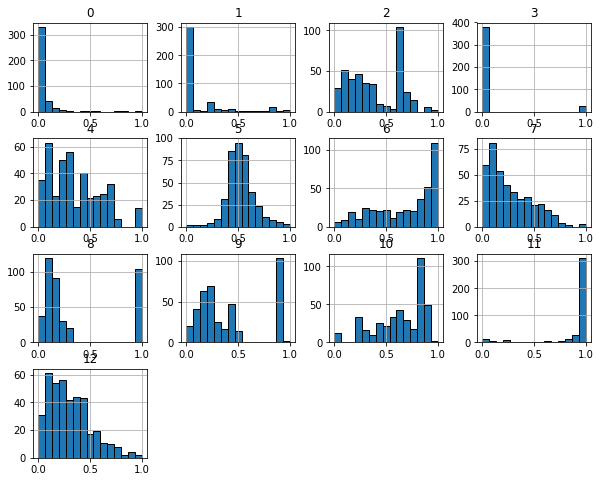

In [32]:
X_train.hist(bins=15, ec='k', figsize=(10,8))
plt.show()

In [33]:
# Model architecture
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [34]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.33, epochs=200, batch_size=5, verbose=False)

In [35]:
# Model accuracy
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

102/102 [==============================] - 0s 150us/step
[20.477571824017694, 20.47757339477539]


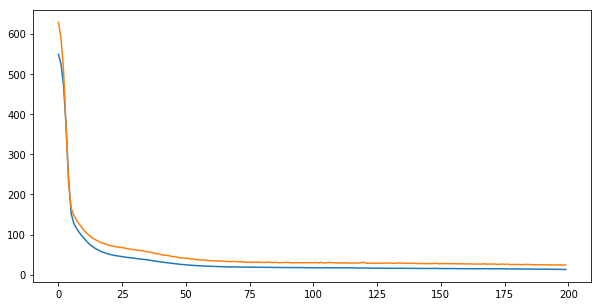

In [36]:
plt.figure(figsize=(10,5))
plt.plot(model.history.history['mse'])
plt.plot(model.history.history['val_mse'])